Problem Statement


As part of Module 11, you are required to complete the project titled “Neural Network from Scratch”. This project is designed to test your understanding of fundamental neural network concepts by implementing a basic feedforward neural network using only NumPy, no external ML libraries like TensorFlow or PyTorch.
You will work with synthetic image data representing the characters A, B, and C using binary pixel patterns. Each image is a 5×6 (30-pixel) grid encoded as a 1D array. Your goal is to classify the input image as A, B, or C using a two-layer neural network trained via backpropagation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_dataset():
    A = np.array([
        [0,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,1],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,0,0,0,1]
    ])

    B = np.array([
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,1,1,1,0],
        [1,0,0,0,1],
        [1,0,0,0,1],
        [1,1,1,1,0]
    ])

    C = np.array([
        [0,1,1,1,1],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [1,0,0,0,0],
        [0,1,1,1,1]
    ])

    letters = [A, B, C]
    labels = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]  # One-hot encoded labels
    X = np.array([img.flatten() for img in letters])
    Y = np.array(labels)
    return X, Y, letters


2. Activation Functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=0, keepdims=True))
    return e_z / np.sum(e_z, axis=0, keepdims=True)


 3. Loss Function 

In [4]:
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true.T * np.log(y_pred + 1e-8)) / m
    return loss

def compute_accuracy(y_true, y_pred):
    preds = np.argmax(y_pred, axis=0)
    labels = np.argmax(y_true, axis=1)
    return np.mean(preds == labels)

4. Initialize Parameters 

In [5]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.1
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.1
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

5. Forward & Backward Pass

In [6]:
def forward(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]
    dZ2 = A2 - Y.T
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2


6. Training 

In [7]:
def train(X, Y, hidden_size=16, epochs=1000, lr=0.5):
    input_size = X.shape[1]
    output_size = Y.shape[1]
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    losses = []
    accuracies = []

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward(X, W1, b1, W2, b2)
        loss = compute_loss(Y, A2)
        acc = compute_accuracy(Y, A2)

        dW1, db1, dW2, db2 = backward(X, Y, Z1, A1, A2, W2)

        # Update weights
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        losses.append(loss)
        accuracies.append(acc)

        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")
    
    return W1, b1, W2, b2, losses, accuracies


7. Prediction & Visualization

In [8]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)

def show_letter(letter_matrix, title="Input Image"):
    plt.imshow(letter_matrix, cmap="gray")
    plt.title(title)
    plt.axis('off')
    plt.show()

def plot_training(losses, accuracies):
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title("Loss over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2)
    plt.plot(accuracies)
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.tight_layout()
    plt.show()

8. Main

Epoch 0: Loss = 1.1016, Accuracy = 0.3333
Epoch 100: Loss = 0.0400, Accuracy = 1.0000
Epoch 200: Loss = 0.0135, Accuracy = 1.0000
Epoch 300: Loss = 0.0078, Accuracy = 1.0000
Epoch 400: Loss = 0.0054, Accuracy = 1.0000
Epoch 500: Loss = 0.0041, Accuracy = 1.0000
Epoch 600: Loss = 0.0033, Accuracy = 1.0000
Epoch 700: Loss = 0.0028, Accuracy = 1.0000
Epoch 800: Loss = 0.0024, Accuracy = 1.0000
Epoch 900: Loss = 0.0021, Accuracy = 1.0000
Epoch 999: Loss = 0.0018, Accuracy = 1.0000

Predictions:


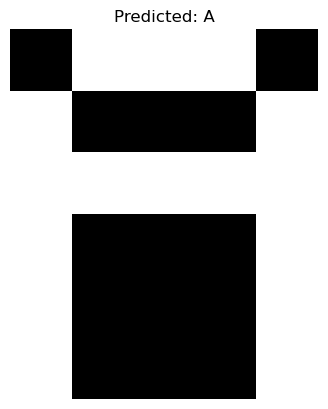

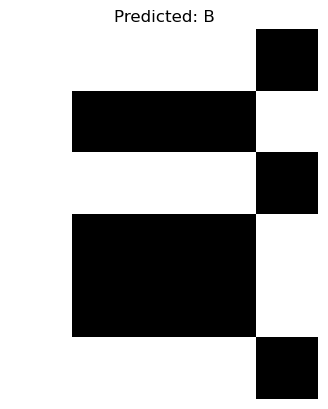

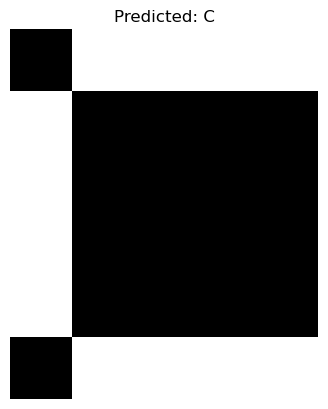

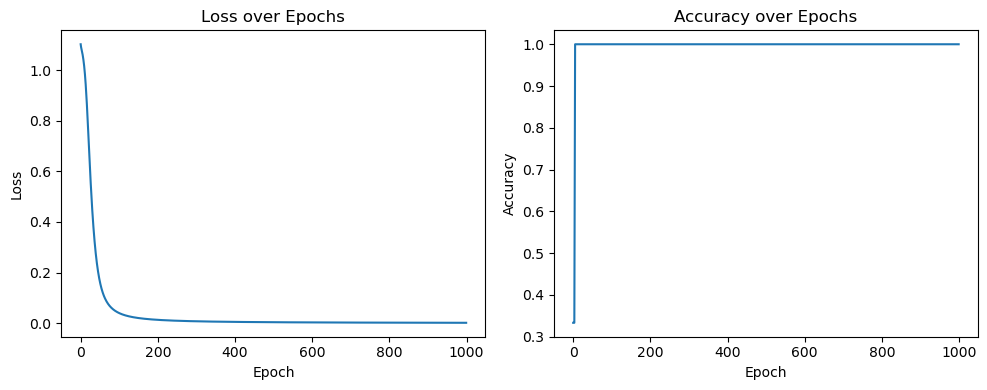

In [9]:
if __name__ == "__main__":
    X, Y, letters = generate_dataset()
    W1, b1, W2, b2, losses, accuracies = train(X, Y, hidden_size=10, epochs=1000, lr=0.5)
    preds = predict(X, W1, b1, W2, b2)

    class_names = ["A", "B", "C"]
    print("\nPredictions:")
    for i, p in enumerate(preds):
        show_letter(letters[i], f"Predicted: {class_names[p]}")

    plot_training(losses, accuracies)
